# <span style='color:lightgreen'>Setp 1 Import the datas and packages</span>

In [1]:
# bin/bash
! ls

RA_DEGs_data.csv      SVM_DEGs_screen.ipynb clinical_data.xlsx


## 1. Load the required packages


In [2]:
# Step 1 prepare the environment
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics
import transformers
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torch.nn.init as init
from torch.utils.data import Dataset, DataLoader
import pandas as pd


## 2. Load the data

In [ ]:
# Read the CSV file
data = pd.read_csv('DEGs_data.csv',
                   index_col=0)

# Display the first few rows of the dataframe
# print(data.head())
# data.drop(columns=['gene'], inplace=True)
data

,normal_tissue_1,normal_tissue_2,normal_tissue_3,normal_tissue_4,normal_tissue_5,normal_tissue_6,normal_tissue_7,normal_tissue_8,normal_tissue_9,normal_tissue_10,...,RA_tissue_143,RA_tissue_144,RA_tissue_145,RA_tissue_146,RA_tissue_147,RA_tissue_148,RA_tissue_149,RA_tissue_150,RA_tissue_151,RA_tissue_152
AMH,1.172986,0.206868,0.799163,0.290851,0.797128,0.281343,0.317564,0.855202,0.545212,0.720135,...,0.346863,0.313592,0.271146,0.212411,0.230904,0.198589,0.028029,0.354455,0.057487,0.039404
CCL13,0.966159,0.411845,2.520192,1.260634,1.938298,2.906054,2.383107,0.460074,0.000000,1.909350,...,2.803111,3.284029,2.651688,2.549391,6.338071,3.411640,4.232195,1.389775,3.615933,2.455662
CCL17,0.000000,0.031432,0.000000,0.000000,0.000000,0.147519,0.127414,0.157785,0.000000,0.000000,...,0.084606,0.313592,0.186303,0.212411,1.596929,0.837594,0.000000,0.105618,0.029030,0.000000
CCL18,1.310712,0.062193,0.847435,1.944057,0.845309,2.760839,2.081235,2.754837,1.361237,2.172534,...,3.038718,4.565857,2.280847,4.217787,8.151395,3.821117,4.752492,2.582009,6.882573,5.453106
CCL19,0.202353,0.031432,0.122754,0.416886,0.000000,2.030807,0.607130,0.398160,0.000000,0.170298,...,0.240247,0.536959,0.869527,1.658680,0.855985,1.508271,1.096174,0.266094,0.139637,0.915371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TNFRSF17,0.000000,0.000000,0.122754,0.000000,0.082718,0.364125,0.000000,0.194675,0.000000,0.000000,...,1.082273,0.096762,2.122409,0.964760,0.157967,2.229397,0.055525,0.071264,0.428180,0.077760
TNFRSF25,4.680541,0.824483,3.669372,4.267522,3.380213,3.210100,3.328943,4.919764,1.523667,2.572644,...,2.218502,1.791883,1.133989,2.564944,2.352710,2.472548,0.803641,2.984029,1.541321,1.733742
TNFSF13B,2.705099,1.242203,2.688644,2.688055,2.493743,4.512205,3.459806,3.029547,0.968452,1.852089,...,3.308704,4.501038,2.114777,4.707410,5.593888,4.925622,4.663714,4.584308,4.388150,4.565442
XCL1,0.000000,0.031432,0.122754,0.000000,0.000000,0.480020,0.086181,0.548232,0.000000,0.000000,...,0.164525,0.429594,0.475664,0.362354,0.300331,0.895966,0.210323,0.296153,0.314879,0.115123


In [5]:
# rename the dataframe for clarity
RA_exp = data

In [8]:

# Read the Excel file
clinical = pd.read_excel('clinical_data.xlsx', index_col=0)

# Display the first few rows of the dataframe
clinical


,group
sample,
normal_tissue_1,normal
normal_tissue_2,normal
normal_tissue_3,normal
normal_tissue_4,normal
normal_tissue_5,normal
...,...
RA_tissue_148,RA
RA_tissue_149,RA
RA_tissue_150,RA


In [19]:
clinical.index

Index(['normal_tissue_1', 'normal_tissue_2', 'normal_tissue_3',
       'normal_tissue_4', 'normal_tissue_5', 'normal_tissue_6',
       'normal_tissue_7', 'normal_tissue_8', 'normal_tissue_9',
       'normal_tissue_10',
       ...
       'RA_tissue_143', 'RA_tissue_144', 'RA_tissue_145', 'RA_tissue_146',
       'RA_tissue_147', 'RA_tissue_148', 'RA_tissue_149', 'RA_tissue_150',
       'RA_tissue_151', 'RA_tissue_152'],
      dtype='object', name='sample', length=180)

## 3. Prepare the data for support vector machine

In [ ]:
RA_exp.head()

,normal_tissue_1,normal_tissue_2,normal_tissue_3,normal_tissue_4,normal_tissue_5,normal_tissue_6,normal_tissue_7,normal_tissue_8,normal_tissue_9,normal_tissue_10,...,RA_tissue_143,RA_tissue_144,RA_tissue_145,RA_tissue_146,RA_tissue_147,RA_tissue_148,RA_tissue_149,RA_tissue_150,RA_tissue_151,RA_tissue_152
AMH,1.172986,0.206868,0.799163,0.290851,0.797128,0.281343,0.317564,0.855202,0.545212,0.720135,...,0.346863,0.313592,0.271146,0.212411,0.230904,0.198589,0.028029,0.354455,0.057487,0.039404
CCL13,0.966159,0.411845,2.520192,1.260634,1.938298,2.906054,2.383107,0.460074,0.000000,1.909350,...,2.803111,3.284029,2.651688,2.549391,6.338071,3.411640,4.232195,1.389775,3.615933,2.455662
CCL17,0.000000,0.031432,0.000000,0.000000,0.000000,0.147519,0.127414,0.157785,0.000000,0.000000,...,0.084606,0.313592,0.186303,0.212411,1.596929,0.837594,0.000000,0.105618,0.029030,0.000000
CCL18,1.310712,0.062193,0.847435,1.944057,0.845309,2.760839,2.081235,2.754837,1.361237,2.172534,...,3.038718,4.565857,2.280847,4.217787,8.151395,3.821117,4.752492,2.582009,6.882573,5.453106
CCL19,0.202353,0.031432,0.122754,0.416886,0.000000,2.030807,0.607130,0.398160,0.000000,0.170298,...,0.240247,0.536959,0.869527,1.658680,0.855985,1.508271,1.096174,0.266094,0.139637,0.915371


In [ ]:
clinical.head()

,group
sample,
normal_tissue_1,normal
normal_tissue_2,normal
normal_tissue_3,normal
normal_tissue_4,normal
normal_tissue_5,normal


# Step 2: Train the SVM model

## 1. Load the packages for SVM

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming RA_exp and clinical are already loaded as DataFrames
# RA_exp: gene expression data (samples x genes)
# clinical: clinical data (samples x clinical features)

## 2. Spilt the data into training and testing sets

In [ ]:

RA_exp.columns 


Index(['normal_tissue_1', 'normal_tissue_2', 'normal_tissue_3',
       'normal_tissue_4', 'normal_tissue_5', 'normal_tissue_6',
       'normal_tissue_7', 'normal_tissue_8', 'normal_tissue_9',
       'normal_tissue_10',
       ...
       'RA_tissue_143', 'RA_tissue_144', 'RA_tissue_145', 'RA_tissue_146',
       'RA_tissue_147', 'RA_tissue_148', 'RA_tissue_149', 'RA_tissue_150',
       'RA_tissue_151', 'RA_tissue_152'],
      dtype='object', length=180)

In [ ]:
clinical.index.name = 'SampleID'
clinical.index 


Index(['normal_tissue_1', 'normal_tissue_2', 'normal_tissue_3',
       'normal_tissue_4', 'normal_tissue_5', 'normal_tissue_6',
       'normal_tissue_7', 'normal_tissue_8', 'normal_tissue_9',
       'normal_tissue_10',
       ...
       'RA_tissue_143', 'RA_tissue_144', 'RA_tissue_145', 'RA_tissue_146',
       'RA_tissue_147', 'RA_tissue_148', 'RA_tissue_149', 'RA_tissue_150',
       'RA_tissue_151', 'RA_tissue_152'],
      dtype='object', name='SampleID', length=180)

In [31]:
# TCGA_exp2 = TCGA_exp
RA_exp.T.index.names = ['SampleID']
RA_exp.T.index

Index(['normal_tissue_1', 'normal_tissue_2', 'normal_tissue_3',
       'normal_tissue_4', 'normal_tissue_5', 'normal_tissue_6',
       'normal_tissue_7', 'normal_tissue_8', 'normal_tissue_9',
       'normal_tissue_10',
       ...
       'RA_tissue_143', 'RA_tissue_144', 'RA_tissue_145', 'RA_tissue_146',
       'RA_tissue_147', 'RA_tissue_148', 'RA_tissue_149', 'RA_tissue_150',
       'RA_tissue_151', 'RA_tissue_152'],
      dtype='object', name='SampleID', length=180)

In [74]:
# data.columns

### 2.1 Modify the features

In [23]:
clinical

,group
SampleID,
normal_tissue_1,normal
normal_tissue_2,normal
normal_tissue_3,normal
normal_tissue_4,normal
normal_tissue_5,normal
...,...
RA_tissue_148,RA
RA_tissue_149,RA
RA_tissue_150,RA


In [32]:
X = RA_exp.T
y = clinical['group'].map({"normal": 0, "RA": 1})  # Binary target: 1 = RA, 0 = normal

# Ensure the indices of X and y match
# X.index.name = "SampleID"
# y.index.name = "SampleID"
# X = X.loc[y.index]  # Align X with y based on SampleID


In [19]:
# Handle missing values (if any)
X = X.fillna(X.median())  # Replace missing values with the median (or use another strategy)

In [33]:
# Split data into training and testing sets
split_ratio = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)


In [34]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 2.2 Train the model

In [35]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
from joblib import parallel_backend
# Check for missing values in the dataset
print("Number of missing values in X_train:", np.isnan(X_train).sum())
print("Number of missing values in X_test:", np.isnan(X_test).sum())

Number of missing values in X_train: 0
Number of missing values in X_test: 0


In [36]:
# # Handle missing values in X_train and X_test
# X_train = np.nan_to_num(X_train, nan=np.nanmedian(X_train))
# X_test = np.nan_to_num(X_test, nan=np.nanmedian(X_test))

# # Train an SVM model
# svm_model = SVC(kernel="linear", probability=True, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel="linear", probability=True, random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', probability=True, random_state=42)

## 3. Predict the model

In [39]:
y_prob = svm_model.predict_proba(X_test)[:, 1]
y_pred = svm_model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
# Calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.99


## 4. Output the reuslts

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Example: Predict probabilities for the test set
y_prob = svm_model.predict_proba(X_test)
print("Predicted Probabilities (first 5 samples):")
print(y_prob[:5])

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        16
           1       0.99      0.96      0.97        74

    accuracy                           0.96        90
   macro avg       0.91      0.95      0.93        90
weighted avg       0.96      0.96      0.96        90

Predicted Probabilities (first 5 samples):
[[6.86869301e-01 3.13130699e-01]
 [2.23717866e-01 7.76282134e-01]
 [3.57634439e-06 9.99996424e-01]
 [2.75713234e-03 9.97242868e-01]
 [1.36972265e-06 9.99998630e-01]]


### 4.1 Plot the ROC for the model prediction

AUC Score: 0.99


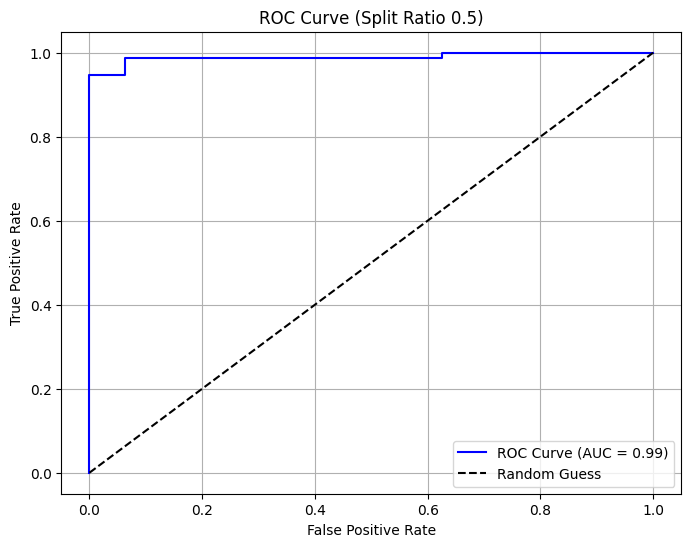

In [45]:

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:, 1])  # Use probabilities for the positive class (1)

# Calculate the AUC
auc_score = roc_auc_score(y_test, y_prob[:, 1])
print(f"AUC Score: {auc_score:.2f}")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Split Ratio 0.5)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### 4.2 Plot the confusion matrix

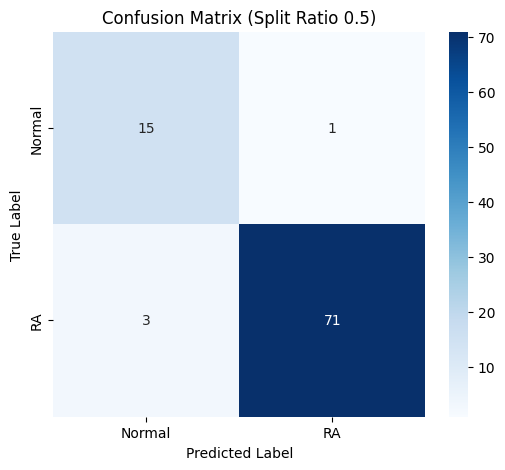

In [47]:
import seaborn as sns
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "RA"], yticklabels=["Normal", "RA"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Split Ratio 0.5)")
# plt.savefig(f"{dir_svm}/svm_confusion_matrix_split_0.5.pdf")
plt.show()

### 4.3 Plot the TOP10 important features (genes)

In [49]:
# Feature importance visualization for SVM
coefficients = svm_model.coef_[0]
gene_names = X.columns
gene_importance = pd.DataFrame({"Gene": gene_names, "Coefficient": coefficients}).sort_values(by="Coefficient", ascending=False)

/var/folders/_l/q77llyxj62n6ltz2_pvnllqr0000gn/T/ipykernel_4167/2722583124.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genes["Coefficient"], y=top_genes["Gene"], palette="Blues_d")


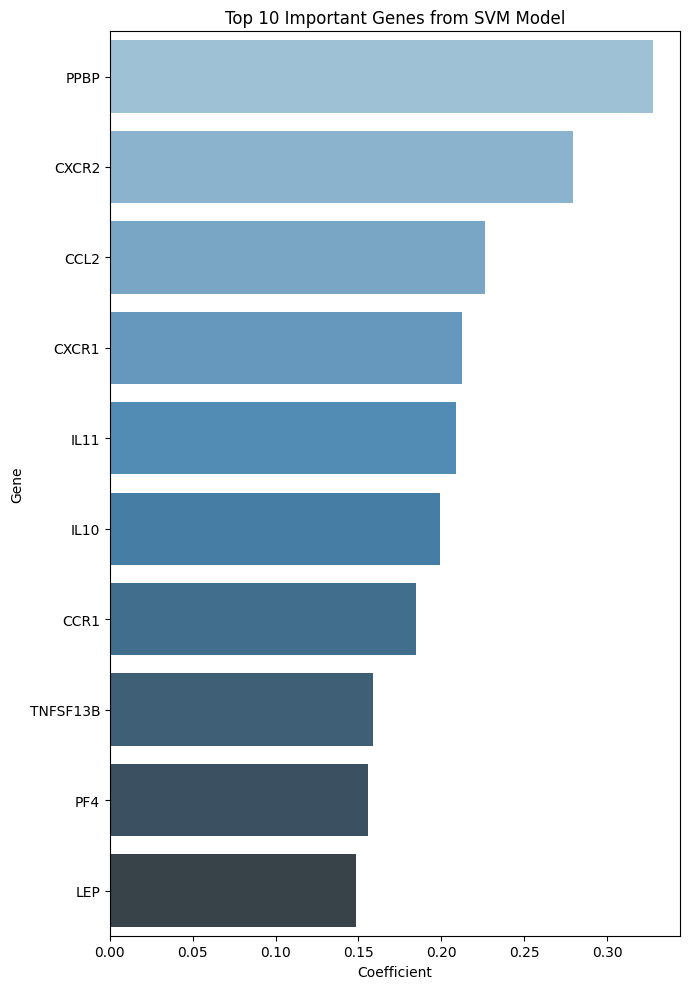

In [51]:
# Plot top 10 important genes
top_genes = gene_importance.head(10)
plt.figure(figsize=(7, 10))
sns.barplot(x=top_genes["Coefficient"], y=top_genes["Gene"], palette="Blues_d")
plt.xlabel("Coefficient")
plt.ylabel("Gene")
plt.title("Top 10 Important Genes from SVM Model")
plt.tight_layout()
# plt.savefig(f"{dir_svm}/svm_top_genes.pdf")
plt.show()

# <span style='color:lightgreen'>Setp 3 Summary</span>

## SVM-Based Classification of Rheumatoid Arthritis Using GEO Bulk RNA-seq Data

This code snippet calculates the Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) score for the predictions made by a Support Vector Machine (SVM) model. It uses the `roc_curve` function to compute the false positive rate (FPR), true positive rate (TPR), and thresholds based on the true labels (`y_test`) and predicted probabilities (`y_prob`). The `roc_auc_score` function is then used to calculate the AUC score, which is printed to the console.

The data used in this analysis comes from the **<span style='color:pink'>Gene Expression Omnibus (GEO)</span>** dataset for **<span style='color:pink'>rheumatoid arthritis (RA)</span>** differentially expressed genes (DEGs). The <span style='color:pink'>Support Vector Machine (SVM)</span> model is applied to predict disease status based on the gene expression data.

This analysis demonstrates the use of machine learning techniques to analyze gene expression data and evaluate the model's performance using ROC and AUC metrics.

# <span style='color:lightgreen'>*Citation*</span>
If you found this code snippet helpful in your research, please consider citing it as follows:

**Zackary YE**. *SVM-Based Classification of the DEGs of Bulk RNA-seq Data*. 2026. Available at: [https://github.com/Zackary-YY/SVM-Classification-for-DEGs](https://github.com/Zackary-YY/SVM-Classification-for-DEGs).

Thank you for acknowledging this work in your research!